In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean


In [2]:
apps = pd.read_csv("C:/Users/lenovo/Downloads/apps.csv")

In [3]:
apps = apps.drop_duplicates()

In [4]:
#odstranění nežádoucích znaků a transformace datových typů
chars = ["$","+",","]
cols_to_clean = ["Installs","Price"]
apps = pd.read_csv("C:/Users/lenovo/Downloads/apps.csv")
apps = apps.drop_duplicates()

for col in cols_to_clean:
    for char in chars:
        apps[col]=apps[col].apply(lambda x: x.replace(char,""))
    apps[col] = apps[col].astype(float)

In [5]:
apps.isna().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [6]:
apps.mean()
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
Unnamed: 0        9659 non-null int64
App               9659 non-null object
Category          9659 non-null object
Rating            8196 non-null float64
Reviews           9659 non-null int64
Size              8432 non-null float64
Installs          9659 non-null float64
Type              9659 non-null object
Price             9659 non-null float64
Content Rating    9659 non-null object
Genres            9659 non-null object
Last Updated      9659 non-null object
Current Ver       9651 non-null object
Android Ver       9657 non-null object
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


In [7]:
apps.head(5)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
#počet různých kategorii aplikaci
num_categories = len(pd.unique(apps["Category"]))
pd.unique(apps["Category"])
print('Number of categories = ', num_categories)

Number of categories =  33


In [9]:
#vizualizace počtu v kategorii
noac = apps["Category"].value_counts(ascending = False)
print(noac)
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
data = [go.Bar(
        x = noac.index, 
        y = noac.values, # value = count
)]

plotly.offline.iplot(data)

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


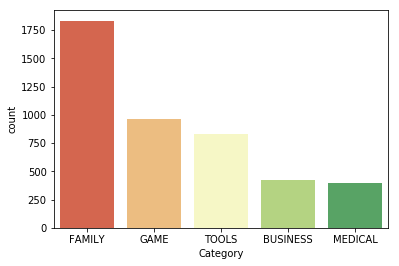

In [10]:
#zastoupení kategorii v datasetu; top 5
sns.countplot(x="Category",data=apps,palette="RdYlGn",order=apps.Category.value_counts().iloc[:5].index)

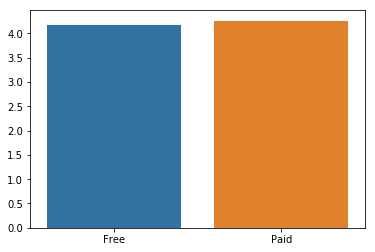

In [11]:
#kdo je na tom líp s hodnocením?
f = apps.loc[apps["Type"]=="Free"]
p = apps.loc[apps["Type"]=="Paid"]
f = f.fillna(f.mean())
p = p.fillna(p.mean())
avg = []
lab = ["Free","Paid"]
avg.append(mean(f["Rating"]))
avg.append(mean(p["Rating"]))
sns.barplot(x=lab,y=avg)

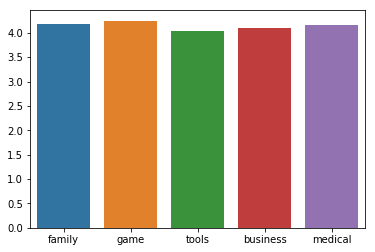

In [12]:
#kdo je na tom nejlíp v hodnocení v rámci kategorie z top 5?
family = apps.loc[apps["Category"]=="FAMILY"]
game = apps.loc[apps["Category"]=="GAME"]
tools = apps.loc[apps["Category"]=="TOOLS"]
business = apps.loc[apps["Category"]=="BUSINESS"]
medical = apps.loc[apps["Category"]=="MEDICAL"]
family = family.fillna(family.mean())
game = game.fillna(game.mean())
tools = tools.fillna(tools.mean())
business = business.fillna(business.mean())
medical = medical.fillna(medical.mean())
avg = []
lab = ["family","game","tools","business","medical"]
avg.append(mean(family["Rating"]))
avg.append(mean(game["Rating"]))
avg.append(mean(tools["Rating"]))
avg.append(mean(business["Rating"]))
avg.append(mean(medical["Rating"]))
sns.barplot(x=lab,y=avg)

In [13]:
#rozdělení v rámci ratingu appek
avg_rating = apps["Rating"].mean()
print('Average app rating = ', avg_rating)


Average app rating =  4.173243045387998


In [14]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

data = [go.Histogram(
        x = apps['Rating']
)]

layout = {'shapes': [{
              'type' :'line',
              'x0': avg_rating,
              'y0': 0,
              'x1': avg_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

In [15]:
rat = apps["Rating"].fillna(apps["Rating"].mean())

D:\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



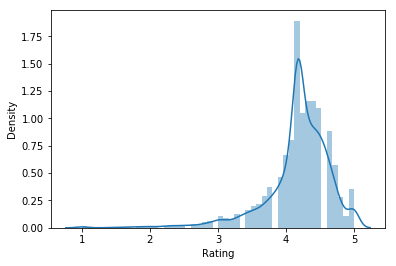

In [16]:
sns.distplot(rat,hist=True, kde = True, norm_hist = True)

Text(0,0.5,'Count')

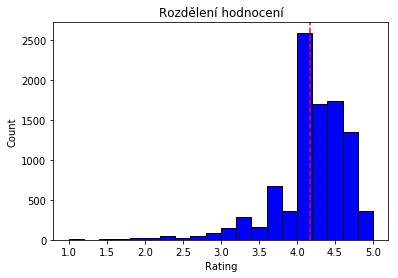

In [17]:

plt.hist(rat,color='blue',edgecolor='black',bins=20)
plt.axvline(avg_rating,color="red",linestyle="dashed")
plt.title("Rozdělení hodnocení")
plt.xlabel("Rating")
plt.ylabel("Count")

In [18]:
#nulový rating
apps[apps["Rating"].isna() ]
#odlišný od 0 Rating a Size, resp zbavit se NaN sračiček
nenulovy_ratasize = apps[(apps["Rating"]>=0) & (apps["Size"]>= 0)]
#kategorie s alespoň 250 appkama


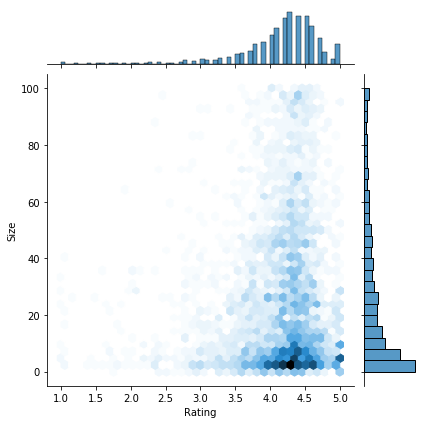

In [19]:
large_categories = nenulovy_ratasize.groupby("Category").filter(lambda x: len(x) >= 250)
plt1 = sns.jointplot(x = large_categories["Rating"], y = large_categories["Size"], kind = 'hex')


In [23]:
#jenom placený appky a nenulový rata a size
placeny_appky = nenulovy_ratasize[nenulovy_ratasize["Type"]=="Paid"]

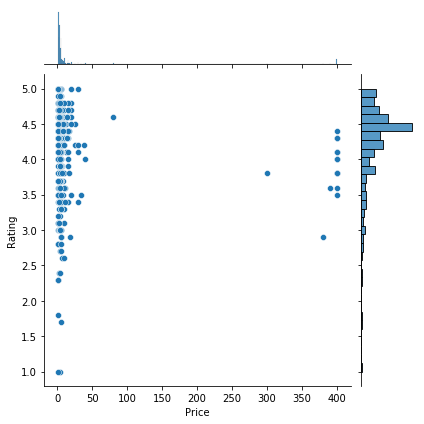

In [24]:
plt2 = sns.jointplot(x = placeny_appky["Price"], y = placeny_appky["Rating"])

In [28]:
apps_above_200 = apps[apps["Price"]>200]

In [45]:
fav_cat = apps_above_200[apps_above_200.Category.isin(["FINANCE","LIFESTYLE","PRODUCTIVITY","PERSONALIZATION","MEDICAL","BUSINESS","TOOLS","GAME","FAMILY"])]
fav_cat.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3327,4197,most expensive app (H),FAMILY,4.3,6,1.5,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
3465,4362,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
3469,4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
4396,5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
4398,5354,I am Rich Plus,FAMILY,4.0,856,8.7,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up


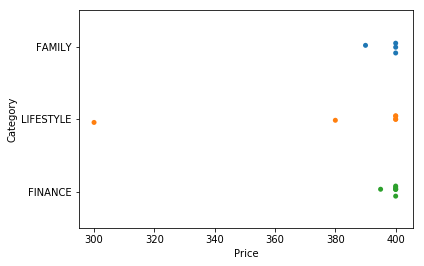

In [46]:
sns.stripplot(x=fav_cat["Price"],y=fav_cat["Category"])

In [74]:

paid = go.Box(y=apps[apps["Type"]=="Paid"]["Installs"], name="Paid")
free = go.Box(y=apps[apps["Type"]=="Paid"]["Installs"], name="Free")
both = go.Box(y=apps[apps["Type"]!=""]["Installs"],name="Paid & Free")
data = [paid,free,both]
layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)
plotly.offline.iplot({'data': data, 'layout': layout})
